Import packages needed for Image Analysis

In [159]:
import cv2
import os
import numpy as np
import random
import matplotlib.pyplot as plt

Definition of functions to do Image Analysis

In [160]:
img_train_dir = "Images/pool/training/images/"
img_val_dir = "Images/pool/testing/images/"

In [208]:
def get_img(image_directory):
    fichiers = [f for f in os.listdir(image_directory) if os.path.isfile(os.path.join(image_directory, f))]
    img_lst = []
    n=1
    for image in fichiers:
        img_dict = {}
        img_path = os.path.join(image_directory, image)
        img_dict["file_name"] = image
        img_dict["image_normal"] = cv2.imread(img_path)
        img_dict["image_grey"] = get_grey_img(cv2.imread(img_path))
        img_lst.append(img_dict)
    
    return img_lst

def get_grey_img(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def get_dataset_analysis(image_list):
    mean_image = np.zeros((224,224))

    for image_dico in image_list:
        mean_image += image_dico["image_grey"]

    return mean_image / len(image_list)

def cv2_imshow(im, true_color = False):
    if true_color:
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure(), plt.imshow(im), plt.axis('off')

def display_n_images(image_list, number):
    for image_dico in random.sample(image_list, number):
        cv2_imshow(im=image_dico["image_normal"], true_color=True)

def create_histograms(channel, channel_name, bin_edges, axes, n, m, color):
    axes[n][m].bar(bin_edges[0:-1], channel, color=color)
    axes[n][m].set_title(f'{channel_name} Channel Histogram')
    axes[n][m].set_xlabel('Pixel Intensity')
    axes[n][m].set_ylabel('Frequency')

def get_histogram_images(image_list):
    # height, width, number_image = len(image_list[0]["image_normal"]), len(image_list[0]["image_normal"][0]), len(image_list)
    height, width, number_image = 224, 224, len(image_list)
    red_channel, blue_channel, green_channel = np.zeros((height,width)), np.zeros((height,width)), np.zeros((height,width))
    hue_channel, sat_channel, value_channel = np.zeros((height,width)), np.zeros((height,width)), np.zeros((height,width))

    for image in image_list:
        img_RGB = cv2.cvtColor(image["image_normal"], cv2.COLOR_BGR2RGB)
        img_HSV = cv2.cvtColor(image["image_normal"], cv2.COLOR_BGR2HSV)

        img_RGB = cv2.resize(img_RGB,(width,height))
        img_HSV = cv2.resize(img_HSV,(width,height))
        
        red_channel += img_RGB[:, :, 0]
        blue_channel += img_RGB[:, :, 1]
        green_channel += img_RGB[:, :, 2]
        hue_channel += img_HSV[:, :, 0]
        sat_channel += img_HSV[:, :, 1]
        value_channel += img_HSV[:, :, 2]
    
    range = 256
    # Calculate the histogram of the RGB channel
    histogram_red, bin_edges_red = np.histogram(red_channel.flatten()/number_image, bins=range, range=[0, range])
    histogram_blue, bin_edges_blue = np.histogram(blue_channel.flatten()/number_image, bins=range, range=[0, range])
    histogram_green, bin_edges_green = np.histogram(green_channel.flatten()/number_image, bins=range, range=[0, range])

    # Calculate the histogram of the HSV channel
    histogram_hue, bin_edges_hue = np.histogram(hue_channel.flatten()/number_image, bins=range, range=[0, range])
    histogram_sat, bin_edges_sat = np.histogram(sat_channel.flatten()/number_image, bins=range, range=[0, range])
    histogram_value, bin_edges_value = np.histogram(value_channel.flatten()/number_image, bins=range, range=[0, range])

    # Plot the red histogram
    fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (10,10))

    create_histograms(histogram_red, "Red", bin_edges_red, axes, 0, 0, "Red")
    create_histograms(histogram_blue, "Blue", bin_edges_blue, axes, 1, 0, "Blue")
    create_histograms(histogram_green, "Green", bin_edges_green, axes, 2, 0, "Green")
    create_histograms(histogram_hue, "Hue",bin_edges_hue, axes, 0, 1, "Black")
    create_histograms(histogram_sat, "Saturation", bin_edges_sat, axes, 1, 1, "Black")
    create_histograms(histogram_value, "Value", bin_edges_value, axes, 2, 1, "Black")
    plt.tight_layout()
    plt.show()



Analysis over Training Folder dataset

In [215]:
img_train_list = get_img(img_train_dir)
print('Number of images in this dataset :', len(img_train_list))

Number of images in this dataset : 1993


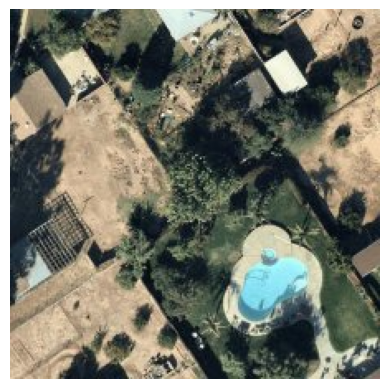

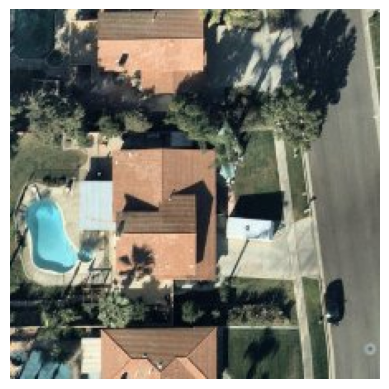

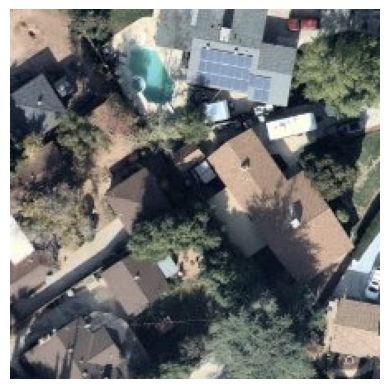

In [216]:
display_n_images(image_list=img_train_list,number=3)

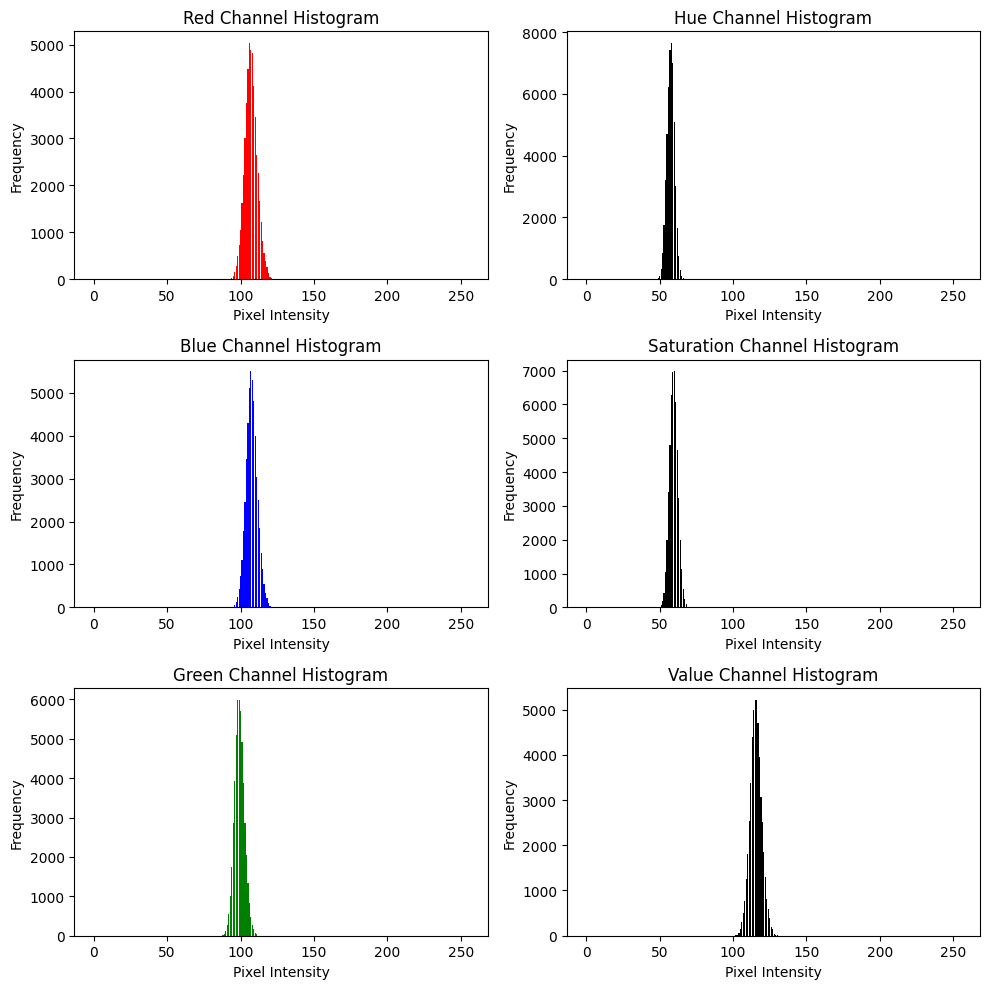

In [218]:
get_histogram_images(image_list=img_train_list[0:61])

Analysis over Testing Folder dataset

In [213]:
img_val_list = get_img(img_val_dir)
print('Number of images in this dataset :', len(img_val_list))

Number of images in this dataset : 2703


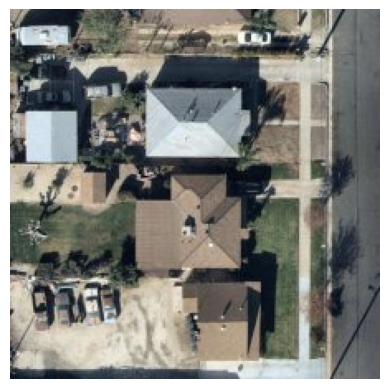

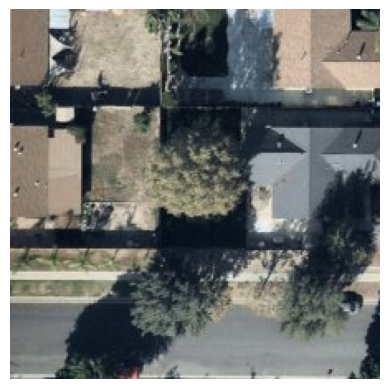

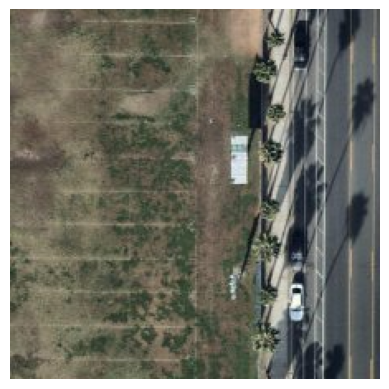

In [167]:
display_n_images(image_list=img_val_list,number=3)

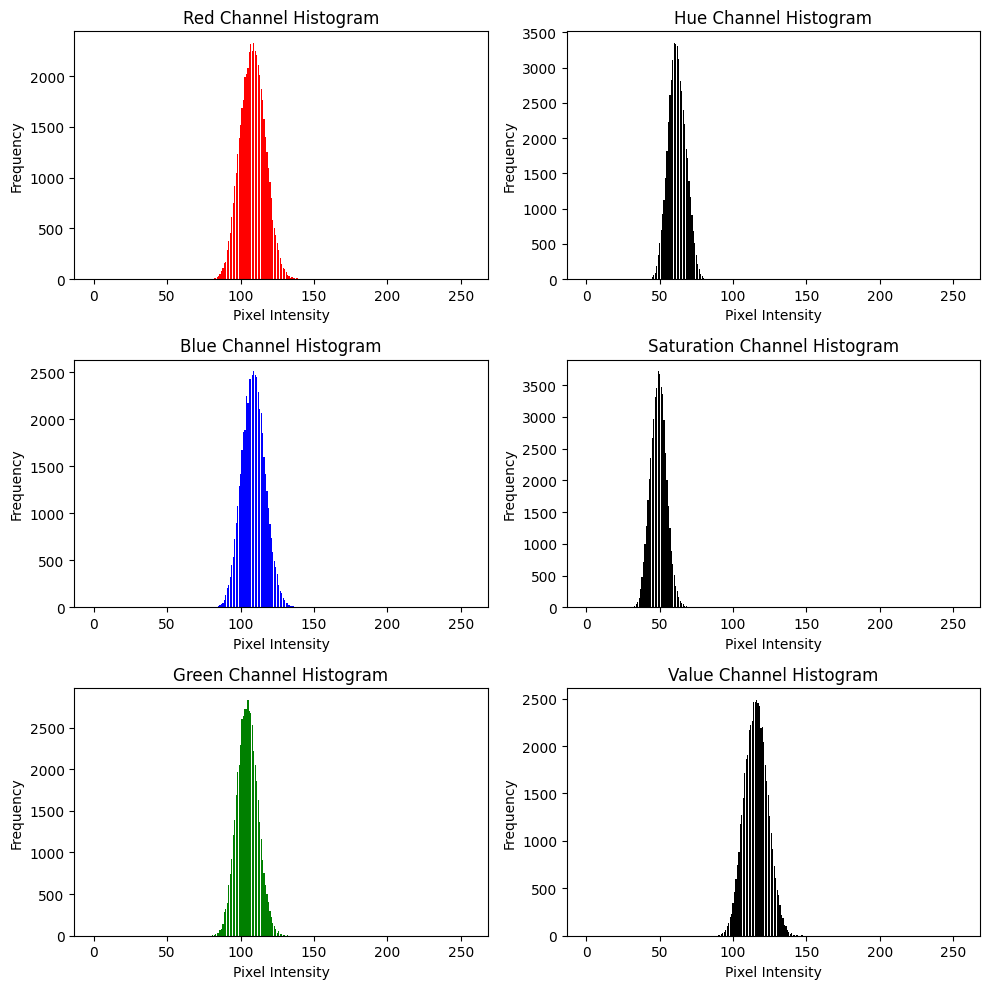

In [209]:
get_histogram_images(img_val_list[0:61])

Analysis over a complete different Dataset


In [212]:
img_balloon = get_img("Images/balloon/train/")
print('Number of images in this dataset :', len(img_balloon))

Number of images in this dataset : 61


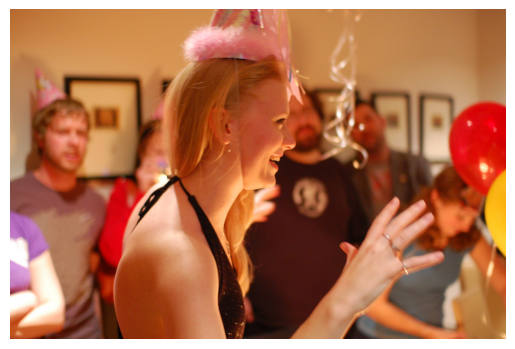

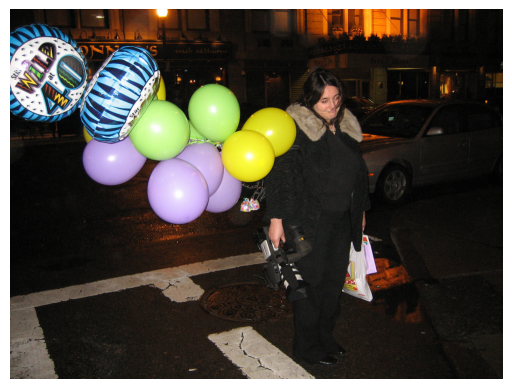

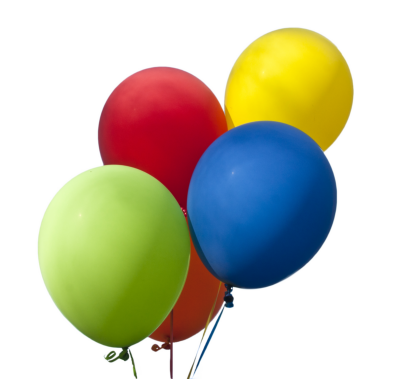

In [211]:
display_n_images(img_balloon, 3)

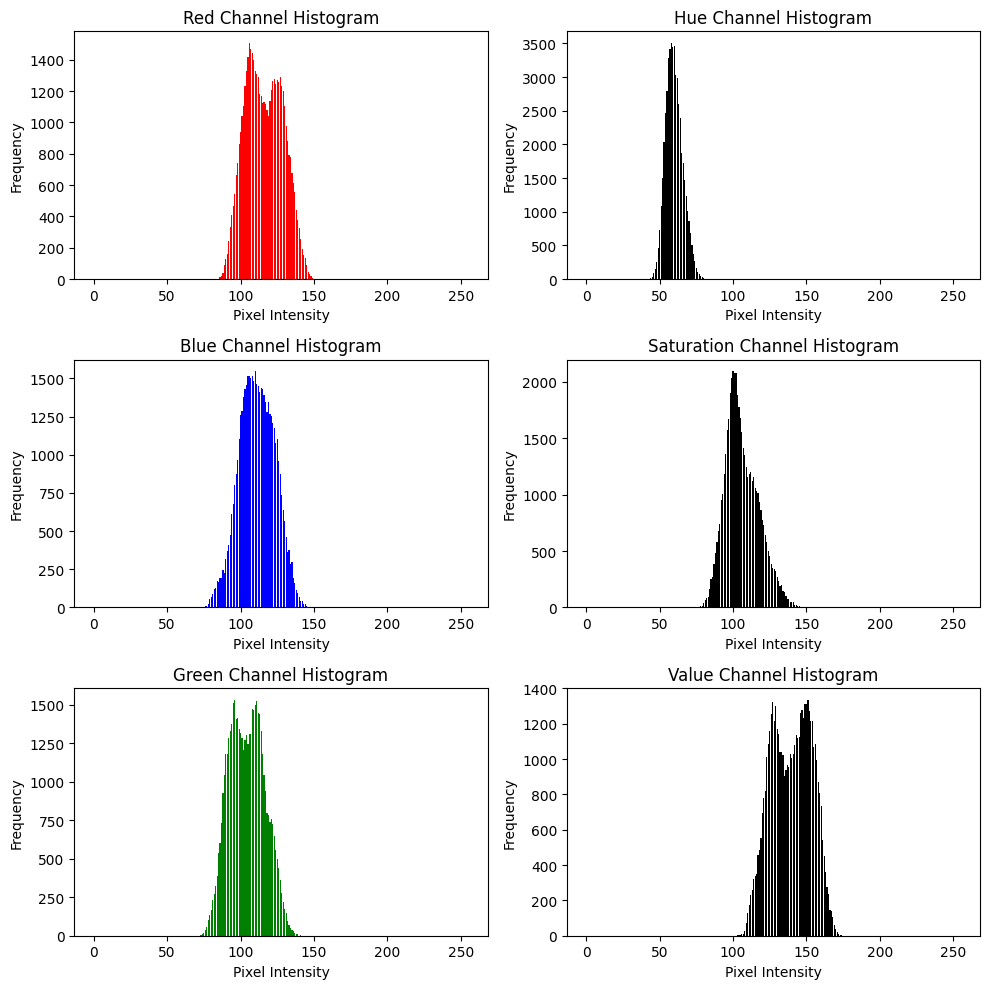

In [210]:
get_histogram_images(img_balloon)